In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor'] = '#D6D6D6'
plt.rcParams['axes.linewidth'] = 2

In [2]:
!pip install seaborn

```

pip install seaborn

conda install seaborn

```

# Preprocessing for Machine learning


We will start with basic but very useful concepts in data science and machine learning/deep learning like variance and covariance matrix and we will go further to some preprocessing techniques used to feed images into neural networks. We will try to get more concrete insights using code to actually see what each equation is doing.

We call preprocessing all transformations on the raw data before it is fed to the machine learning algorithm. For instance, training a convolutional neural network on raw images will probably lead to bad classification performances ([Pal & Sudeep, 2016](https://ieeexplore.ieee.org/document/7808140/)). The preprocessing is also important to speed up training (for instance, centering and scaling techniques, see [Lecun et al., 2012; see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)).



1. **Background**: In the first part, we will get some reminders about variance and covariance and see how to generate and plot fake data to get a better understanding of these concepts.

2. **Preprocessing**: In the second part, we will see the basics of some preprocessing techniques that can be applied to any kind of data: mean normalization, standardisation and whitening.

3. **Whitening images**: In the third part, we will use the tools and concepts gained in 1. and 2. to do a special kind of whitening called Zero Component Analysis (ZCA). It can be used to preprocess images. !


# 1. Background

## A. Variance and covariance

The variance of a variable describes how much the values are spread. The covariance is a measure that tells the amount of dependency between two variables. A positive covariance means that values of the first variable are large when values of the second variables are also large. A negative covariance means the opposite: large values from one variable are associated with small values of the other. The covariance value depends on the scale of the variable so it is hard to analyse it. It is possible to use the correlation coefficient that is easier to interpret. It is just the covariance normalized.

<img src="images/negative-and-positive-covariance.png" width="500" alt="Intuition about the covariance between two variables" title="Representation of the covariance between two variables.">
<em>A positive covariance means that large values of one variable are associated with big values from the other (left). A negative covariance means that large values of one variable are associated with small values of the other one (right).</em>

The covariance matrix is a matrix that summarizes the variances and covariances of a set of vectors and it can tell a lot of things about your variables. The diagonal corresponds to the variance of each vector:

<img src="images/covariance1.png" width="400" alt="Variance in the matrix of covariance" title="Variance in the matrix of covariance is on the diagonal">
<em>A matrix $\boldsymbol{A}$ and its matrix of covariance. The diagonal corresponds to the variance of each column vector.</em>

Let's just check with the formula of the variance:

$$
V(\boldsymbol{X}) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2
$$

with $n$ the length of the vector, and $\bar{x}$ the mean of the vector. For instance, the variance of the first column vector of $\boldsymbol{A}$ is:

$$
V(\boldsymbol{A}_{:,1}) = \frac{(1-3)^2+(5-3)^2+(3-3)^2}{3} = 2.67
$$

This is the first cell of our covariance matrix. The second element on the diagonal corresponds of the variance of the second column vector from $\boldsymbol{A}$ and so on.

*Note*: the vectors extracted from the matrix $\boldsymbol{A}$ correspond to the columns of $\boldsymbol{A}$.

The other cells correspond to the covariance between two column vectors from $\boldsymbol{A}$. For instance, the covariance between the first and the third column is located in the covariance matrix as the column 1 and the row 3 (or the column 3 and the row 1).

<img src="images/covariance2.png" width="400" alt="Covariance in the matrix of covariance" title="The position in the covariance matrix.">
<em>The position in the covariance matrix. Column corresponds to the first variable and row to the second (or the opposite). The covariance between the first and the third column vector of $\boldsymbol{A}$ is the element in column 1 and row 3 (or the opposite = same value).</em>


Let's check that the covariance between the first and the third column vector of $\boldsymbol{A}$ is equal to $-2.67$. The formula of the covariance between two variables $\boldsymbol{X}$ and $\boldsymbol{Y}$ is:

$$
cov(\boldsymbol{X},\boldsymbol{Y}) = \frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
$$

The variables $\boldsymbol{X}$ and $\boldsymbol{Y}$ are the first and the third column vectors in the last example. Let's split this formula:

1. $(x_1-\bar{x})$. The sum symbol means that we will iterate on the elements of the vectors. We will start with the first element ($i=1$) and calculate the first element of $\boldsymbol{X}$ minus the mean of the vector $\boldsymbol{X}$.
2. $(x_1-\bar{x})(y_1-\bar{y})$. Multiply the result with the first element of $\boldsymbol{Y}$ minus the mean of the vector $\boldsymbol{Y}$.
3. $\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$. Reiterate the process for each element of the vectors and calculate the sum of all results.
4. $\frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$. Divide by the number of elements in the vector.


#### Example 1.

Let's start with the matrix $\boldsymbol{A}$:

$$
\boldsymbol{A}=
\begin{bmatrix}
    1 & 3 & 5\\\\
    5 & 4 & 1\\\\
    3 & 8 & 6
\end{bmatrix}
$$

We will calculate the covariance between the first and the third column vectors:

$$
\boldsymbol{X} = \begin{bmatrix}
    1\\\\
    5\\\\
    3
\end{bmatrix}
$$

and

$$\boldsymbol{Y} = \begin{bmatrix}
    5\\\\
    1\\\\
    6
\end{bmatrix}
$$

$\bar{x}=3$, $\bar{y}=4$ and $n=3$ so we have:

$$
cov(X,Y) = \frac{(1-3)(5-4)+(5-3)(1-4)+(3-3)(6-4)}{3}=\frac{-8}{3}=-2.67
$$

That the value of the covariance matrix.

With Numpy, the covariance matrix can be calculated with the function `np.cov`. It is worth noting that if you want Numpy to use the columns as vectors, the parameter `rowvar=False` has to be used. Also, `bias=True` allows to divide by $n$ and not by $n-1$.

Let's create the array first:

In [3]:
A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

Now we will calculate the covariance with the Numpy function:

In [5]:
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

### Finding the covariance matrix with the dot product

There is another way to compute the covariance matrix of $\boldsymbol{A}$. You can center $
\boldsymbol{A}$ around 0 (subtract the mean of the vector to each element of the vector to have a vector of mean equal to 0, *cf*. below), multiply it with its own transpose and divide by the number of observations. Let's start with an implementation and then we'll try to understand the link with the previous equation:

In [99]:
A.shape


(3, 3)

In [6]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

Let's test it on our matrix $\boldsymbol{A}$:

In [7]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

The dot product between two vectors can be expressed:

$$
\boldsymbol{X^\text{T}Y}= \sum_{i=1}^{n}(x_i)(y_i)
$$

It is the sum of the products of each element of the vectors:

<img src="images/dot-product.png" width="400" alt="The dot product corresponds to the sum of the products of each elements of the vectors" title="The dot product.">
<em>The dot product corresponds to the sum of the products of each element of the vectors.</em>

If $n$ is the number of elements in our vectors and that we divide by $n$:

$$
\frac{1}{n}\boldsymbol{X^\text{T}Y}= \frac{1}{n}\sum_{i=1}^{n}(x_i)(y_i)
$$

You can note that this is not too far from the formula of the covariance we have seen above:

$$
cov(\boldsymbol{X},\boldsymbol{Y}) = \frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
$$

The only difference is that in the covariance formula we subtract the mean of a vector to each of its elements. This is why we need to center the data before doing the dot product.

Now if we have a matrix $\boldsymbol{A}$, the dot product between $\boldsymbol{A}$ and its transpose will give you a new matrix:

<img src="images/covariance-dot-product.png" width="400" alt="Covariance matrix and dot product" title="Covariance matrix and dot product.">
<em>If you start with a zero-centered matrix, the dot product between this matrix and its transpose will give you the variance of each vector and covariance between them, that is to say the covariance matrix.</em>

This is the covariance matrix

## B. Visualize data and covariance matrices

In order to get more insights about the covariance matrix and how it can be useful, we will create a function used to visualize it along with 2D data. You will be able to see the link between the covariance matrix and the data.

This function will calculate the covariance matrix as we have seen above. It will create two subplots: one for the covariance matrix and one for the data. The `heatmap` function from Seaborn is used to create gradients of color: small values will be colored in light green and large values in dark blue. The data is represented as a scatterplot. We choose one of our palette colors, but you may prefer other colors.

In [5]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=ACov.min(),vmax=ACov.max())

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

## C. Simulating data

### Uncorrelated data

Now that we have the plot function, we will generate some random data to visualize what the covariance matrice can tell us. We will start with some data drawn from a normal distribution with the Numpy function `np.random.normal()`.

<img src="images/np.random.normal.png" width="400" alt="Parameters of numpy random normal" title="Parameters of Numpy random normal.">
<em>Drawing sample from a normal distribution with Numpy.</em>

This function needs the mean, the standard deviation and the number of observations of the distribution as input. We will create two random variables of 300 observations with a standard deviation of 1. The first will have a mean of 1 and the second a mean of 2. If we draw two times 300 observations from a normal distribution, both vectors will be uncorrelated.

In [10]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

*Note 1*:  We transpose the data with `.T` because the original shape is (2, 300) and we want the number of observations as rows (so with shape (300, 2)).

*Note 2*: We use `np.random.seed` function for reproducibility. The same random number will be used the next time we run the cell!

Let's check how the data looks like:

In [11]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

Nice, we have our two columns vectors.

Now, we can check that the distributions are normal:

C:\Users\sarria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


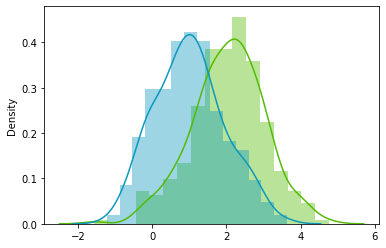

In [12]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()


Looks good! We can see that the distributions have equivalent standard deviations but different means (1 and 2). So that's exactly what we have asked for!

Now we can plot our dataset and its covariance matrix with our function:

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


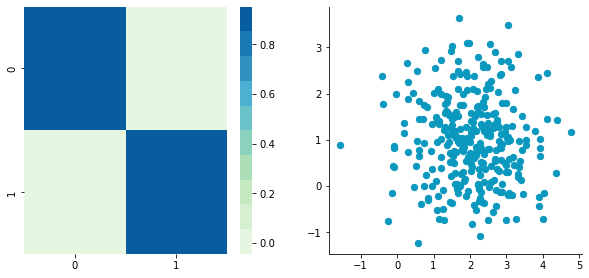

In [13]:
plotDataAndCov(A)



We can see on the scatterplot that the two dimensions are uncorrelated. Note that we have one dimension with a mean of 1 and the other with the mean of 2. Also, the covariance matrix shows that the variance of each variable is very large (around 1) and the covariance of columns 1 and 2 is very small (around 0). Since we insured that the two vectors are independent this is coherent (the opposite is not necessarily true: a covariance of 0 doesn't guaranty independency.

### Correlated data

Now, let's construct dependent data by specifying one column from the other one.

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


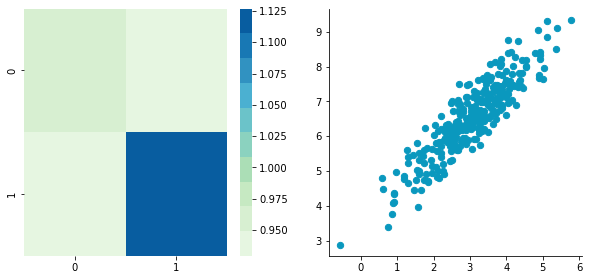

In [14]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)


The correlation between the two dimensions is visible on the scatter plot. We can see that a line could be drawn and used to predict $\boldsymbol{y}$ from $\boldsymbol{x}$ and vice versa. The covariance matrix is not diagonal (there are non-zero cells outside of the diagonal). That means that the covariance between dimensions is non-zero.

We now have all the tools to see different preprocessing techniques.

# 2. Preprocessing

## A. Mean normalization

Mean normalization is just removing the mean from each observation.

$$
\boldsymbol{X'} = \boldsymbol{X} - \bar{x}
$$

where $\boldsymbol{X'}$ is the normalized dataset, $\boldsymbol{X}$ the original dataset and $\bar{x}$ the mean of $\boldsymbol{X}$.

It will have the effect of centering the data around 0. We will create the function `center()` to do that:

In [15]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Let's give it a try with the matrix $\boldsymbol{B}$ we have created above:

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]
After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


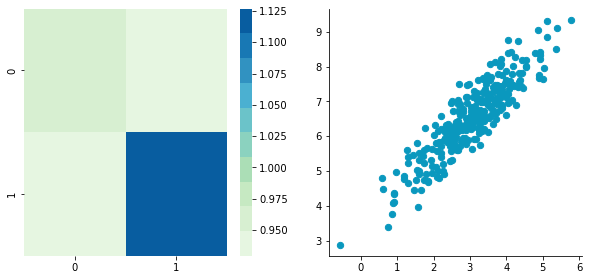

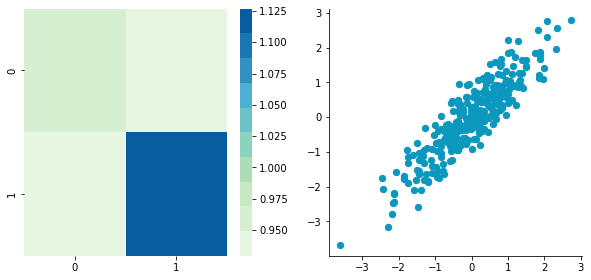

In [20]:
BCentered = center(B)

print('Before:\n\n')

plotDataAndCov(B)


print('After:\n\n')

plotDataAndCov(BCentered)


The first plot shows again the original data $\boldsymbol{B}$ and the second plot shows the centered data (look at the scale).

## B. Standardization

The standardization is used to put all features on the same scale. The way to do it is to divide each zero-centered dimension by its standard deviation.

$$
\boldsymbol{X'} = \frac{\boldsymbol{X} - \bar{x}}{\sigma_{\boldsymbol{X}}}
$$

where $\boldsymbol{X'}$ is the standardized dataset, $\boldsymbol{X}$ the original dataset, $\bar{x}$ the mean of $\boldsymbol{X}$ and $\sigma_{\boldsymbol{X}}$ the standard deviation of $\boldsymbol{X}$.

In [17]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Let's create another dataset with a different scale to check that it is working.

Covariance matrix:
 [[0.95171641 0.93678921]
 [0.93678921 1.01959518]]


(0.0, 15.0)

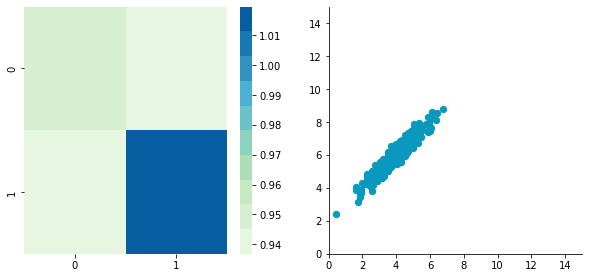

In [48]:
np.random.seed(1234)
c1 = np.random.normal(4, 1, 300)
c2 = c1 + np.random.normal(6, 1, 300)/3.
C = np.array([c1, c2]).T


plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)


We can see that the scales of $x$ and $y$ are different. Note also that the correlation seems smaller because of the scale differences. Now let's standardise it:

Covariance matrix:
 [[1.        0.9509862]
 [0.9509862 1.       ]]


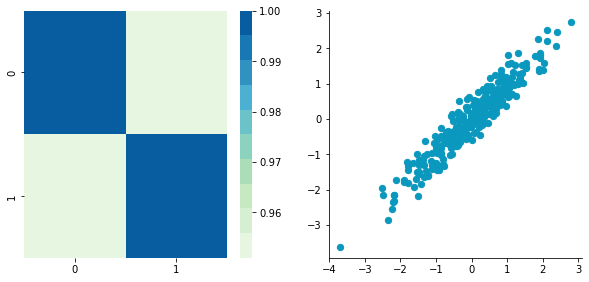

In [49]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)


Looks good! You can see that the scales are the same and that the dataset is zero-centered according to both axes. Now, have a look at the covariance matrix: you can see that the variance of each coordinate (the top-left cell and the bottom-right cell) is equal to 1. By the way, this new covariance matrix is actually the correlation matrix. The Pearson correlation coefficient between the two variables ($\bs{c1}$ and $\bs{c2}$) is 0.54220151.

## C. Whitening

Whitening or sphering data means that we want to transform it in a way to have a covariance matrix that is the identity matrix (1 in the diagonal and 0 for the other cells. It is called whitening in reference to white noise.

Whitening is a bit more complicated but we now have all the tools that we need to do it. It involves the following steps:

    1- Zero-center the data
    2- Decorrelate the data
    3- Rescale the data
    
Let's take again $\boldsymbol{C}$ and try to do these steps.

#### 1. Zero-centering

Covariance matrix:
 [[0.95171641 0.93678921]
 [0.93678921 1.01959518]]


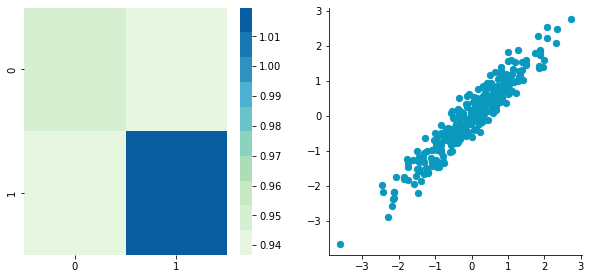

In [50]:
CCentered = center(C)

plotDataAndCov(CCentered)


#### 2. Decorrelate

At this point, we need to decorrelate our data. Intuitively, it means that we want to rotate the data until there is no correlation anymore. Look at the following cartoon to see what I mean:

<img src="images/rotation.png" width="500" alt="Rotation to decorrelate the data" title="The rotation can decorrelate the data.">
<em>The left plot shows correlated data. For instance, if you take a data point with a big $x$ value, chances are that $y$ will also be quite big. Now take all data points and do a rotation (maybe around 45 degrees counterclockwise): the new data (plotted on the right) is not correlated anymore.</em>

The question is: how could we find the right rotation in order to get the uncorrelated data? Actually, it is exactly what the **eigenvectors** of the covariance matrix do: they indicate the direction where the spread of the data is at its maximum:

<img src="images/maxVar.png" width="300" alt="Direction where the variance is maximum" title="There is one direction where the variance is maximum.">
<em>The eigenvectors of the covariance matrix give you the direction that maximizes the variance. The direction of the green line is where the variance is maximum. Just look at the smallest and largest point projected on this line: the spread is big. Compare that with the projection on the orange line: the spread is very small.</em>


So we can decorrelate the data by projecting it on the eigenvectors basis. This will have the effect to apply the rotation needed and remove correlations between the dimensions. Here are the steps:

    1- Calculate the covariance matrix
    2- Calculate the eigenvectors of the covariance matrix
    3- Apply the matrix of eigenvectors to the data (this will apply the rotation)
    
Let's pack that into a function:

In [51]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0]) #np.cov()
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Let's try to decorrelate our zero-centered matrix $\boldsymbol{C}$ to see it in action:

Covariance matrix:
 [[0.95171641 0.93678921]
 [0.93678921 1.01959518]]


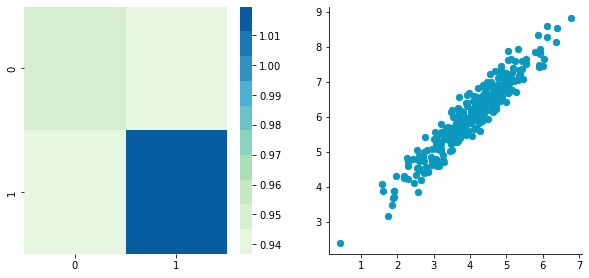

Covariance matrix:
 [[4.82519833e-02 1.81613983e-16]
 [1.81613983e-16 1.92305961e+00]]


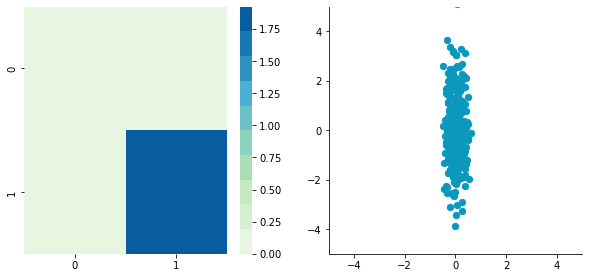

In [52]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()



We can see that the correlation is not here anymore and that the covariance matrix (now a diagonal matrix) confirms that the covariance between the two dimensions is equal to 0.

#### 3. Rescale the data

The next step is to scale the uncorrelated matrix in order to obtain a covariance matrix corresponding to the identity matrix (ones on the diagonal and zeros on the other cells). To do that we scale our decorrelated data by dividing each dimension by the square-root of its corresponding eigenvalue.

In [25]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

*Note:* we add a small value (here $10^{-5}$) to avoid the division by $0$.

Covariance matrix:
 [[ 9.99430602e-01 -1.12502600e-15]
 [-1.12502600e-15  9.99994746e-01]]


(-5.0, 5.0)

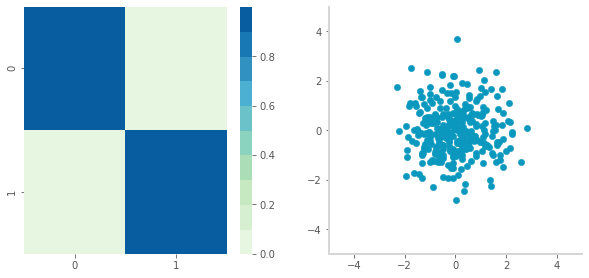

In [26]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)


We can see that with the covariance matrix that this is all good. We have something that really looks to the identity matrix ($1$ on the diagonal and $0$ elsewhere). 

# 3. Image whitening

We will see how whitening can be applied to preprocess image dataset. To do so we will use the paper of [Pal & Sudeep (2016)](https://ieeexplore.ieee.org/document/7808140/) where they give some details about the process. This preprocessing technique is called Zero component analysis (ZCA).

Check out the paper, but here is the kind of result they got:

<img src="images/whitening-images-cifar10-pal-sudeep.png" width="800" alt="Whitening images from the CIFAR10 dataset. Results from the paper of Pal & Sudeep (2016).">
<em>Whitening images from the CIFAR10 dataset. Results from the paper of Pal & Sudeep (2016). The original images (left) and the images after the ZCA (right) are shown.</em>

We will load images from the CIFAR dataset. This dataset is available online and you can download it [here](https://www.cs.toronto.edu/~kriz/cifar.html).


The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle. 

Loaded in this way, each of the batch files contains a dictionary with the following elements:

1. data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
2. labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 


<img src="images/cidar10.png" width="400">



It looks like the images from the paper [Pal & Sudeep (2016)](https://ieeexplore.ieee.org/document/7808140/). They used `epsilon = 0.1`. You can try other values to see the effect on the image.